# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing as sk_pp
from sklearn.model_selection import train_test_split

%matplotlib inline

## Get Data

In [2]:
data = pd.read_csv('../../../Data_AA2/bank-additional-full.csv', sep = ';',na_values="unknown")
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
data.dropna(inplace=True)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30488 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             30488 non-null  int64  
 1   job             30488 non-null  object 
 2   marital         30488 non-null  object 
 3   education       30488 non-null  object 
 4   default         30488 non-null  object 
 5   housing         30488 non-null  object 
 6   loan            30488 non-null  object 
 7   contact         30488 non-null  object 
 8   month           30488 non-null  object 
 9   day_of_week     30488 non-null  object 
 10  duration        30488 non-null  int64  
 11  campaign        30488 non-null  int64  
 12  pdays           30488 non-null  int64  
 13  previous        30488 non-null  int64  
 14  poutcome        30488 non-null  object 
 15  emp.var.rate    30488 non-null  float64
 16  cons.price.idx  30488 non-null  float64
 17  cons.conf.idx   30488 non-null 

In [5]:
def duration(df):

    df.loc[df['duration'] <= 102, 'duration'] = 1
    df.loc[(df['duration'] > 102) & (df['duration'] <= 180)  , 'duration'] = 2
    df.loc[(df['duration'] > 180) & (df['duration'] <= 319)  , 'duration'] = 3
    df.loc[(df['duration'] > 319) & (df['duration'] <= 644.5), 'duration'] = 4
    df.loc[df['duration']  > 644.5, 'duration'] = 5

    return df

duration(data)
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
def age(df):
    df.loc[df['age'] <= 19, 'age'] = 1
    df.loc[(df['age'] > 19) & (df['age'] <= 30), 'age'] = 2
    df.loc[(df['age'] > 30) & (df['age'] <= 60), 'age'] = 3
    df.loc[(df['age'] > 60) & (df['age'] <= 98), 'age'] = 4
           
    return df

age(data)
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,3,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,3,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,3,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,3,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,3,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [7]:
# Label encoder order is alphabetical
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['job'] = le.fit_transform(data['job']) 
data['marital'] = le.fit_transform(data['marital']) 
data['education'] = le.fit_transform(data['education']) 
data['default'] = le.fit_transform(data['default']) 
data['housing'] = le.fit_transform(data['housing']) 
data['loan'] = le.fit_transform(data['loan'])
data['contact'] = le.fit_transform(data['contact']) 
data['month'] = le.fit_transform(data['month']) 
data['day_of_week'] = le.fit_transform(data['day_of_week'])
data['poutcome'] = le.fit_transform(data['poutcome'])

data['y'].replace(['no', 'yes'], [0,1], inplace  = True)
data.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,3,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,3,7,1,3,0,1,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,3,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,3,7,1,3,0,0,1,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
6,3,0,1,5,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
8,2,9,2,5,0,1,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
9,2,7,2,3,0,1,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
11,2,7,2,3,0,1,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
12,2,1,2,3,0,0,1,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
13,3,3,0,0,0,1,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [8]:
from sklearn.model_selection import train_test_split

data_Y = data['y']
data = data.drop(columns=['y']) 

X_train, X_test, Y_train, Y_test = train_test_split( data, data_Y, test_size=0.30)

#Y_train = np.asarray(Y_train).astype('float32').reshape((-1,1))
#Y_test = np.asarray(Y_test).astype('float32').reshape((-1,1))

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

X_train.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,0.400978,-1.029829,-0.304997,1.080147,-0.006845,0.921057,-0.430367,1.438667,1.573291,-0.722621,-0.457999,-0.556650,0.212854,-0.370943,0.192221,-0.015348,0.475623,0.043072,0.817968,0.465531
1,0.400978,1.460517,1.297008,0.576115,-0.006845,-1.085709,-0.430367,-0.695088,0.734320,0.706549,1.967752,-0.189058,0.212854,1.528361,-2.413996,-1.069706,-1.075535,-1.167259,-1.190367,-0.823224
2,0.400978,-1.029829,1.297008,1.080147,-0.006845,0.921057,-0.430367,-0.695088,-0.104650,-0.008036,-1.266583,-0.189058,0.212854,-0.370943,0.192221,-1.751938,-0.955556,-0.040399,-1.237648,-1.128420
3,0.400978,0.907107,1.297008,-0.431950,-0.006845,-1.085709,-0.430367,-0.695088,1.153806,1.421134,-0.457999,-0.189058,0.212854,-0.370943,0.192221,-0.015348,-0.549341,-0.290812,0.372172,0.465531
4,0.400978,-1.029829,-1.907003,-0.431950,-0.006845,0.921057,-0.430367,-0.695088,0.734320,-0.722621,0.350585,-0.189058,0.212854,-0.370943,0.192221,-1.069706,-1.075535,-1.167259,-1.215696,-0.823224
5,0.400978,-1.029829,-0.304997,1.080147,-0.006845,0.921057,-0.430367,-0.695088,-1.363106,-1.437207,1.159168,-0.556650,0.212854,-0.370943,0.192221,0.914969,-0.131128,0.940387,0.848363,0.896005
6,-1.846793,-1.029829,1.297008,1.080147,-0.006845,0.921057,-0.430367,-0.695088,1.153806,0.706549,1.159168,-0.556650,0.212854,-0.370943,0.192221,-2.062044,-1.493747,2.192453,-1.541600,-1.910736
7,0.400978,0.076991,-0.304997,1.080147,-0.006845,0.921057,-0.430367,-0.695088,0.734320,-1.437207,1.967752,-0.556650,0.212854,-0.370943,0.192221,-1.069706,-1.075535,-1.167259,-1.207816,-0.823224
8,0.400978,-1.029829,-1.907003,1.080147,-0.006845,-1.085709,-0.430367,-0.695088,0.734320,0.706549,-1.266583,-0.556650,0.212854,-0.370943,0.192221,-1.069706,-1.075535,-1.167259,-1.234271,-0.823224
9,0.400978,-1.029829,1.297008,-0.431950,-0.006845,0.921057,-0.430367,1.438667,0.734320,1.421134,0.350585,-0.556650,0.212854,-0.370943,0.192221,0.728905,0.811564,0.877783,0.786447,0.401560


In [10]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21341 entries, 0 to 21340
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             21341 non-null  float64
 1   job             21341 non-null  float64
 2   marital         21341 non-null  float64
 3   education       21341 non-null  float64
 4   default         21341 non-null  float64
 5   housing         21341 non-null  float64
 6   loan            21341 non-null  float64
 7   contact         21341 non-null  float64
 8   month           21341 non-null  float64
 9   day_of_week     21341 non-null  float64
 10  duration        21341 non-null  float64
 11  campaign        21341 non-null  float64
 12  pdays           21341 non-null  float64
 13  previous        21341 non-null  float64
 14  poutcome        21341 non-null  float64
 15  emp.var.rate    21341 non-null  float64
 16  cons.price.idx  21341 non-null  float64
 17  cons.conf.idx   21341 non-null 

In [11]:
Y_train.value_counts()

0    18656
1     2685
Name: y, dtype: int64

In [12]:
from imblearn.over_sampling import SMOTE

strategy = {1:5000}
sm = SMOTE(random_state = 2,sampling_strategy=strategy)

X_train, Y_train = sm.fit_resample(X_train, Y_train)

In [13]:
from imblearn.under_sampling import NearMiss

# define the undersampling method
undersample = NearMiss(version=1, n_neighbors=3)
# transform the dataset
X_train, Y_train = undersample.fit_resample(X_train, Y_train)

In [14]:
Y_train.value_counts()

1    5000
0    5000
Name: y, dtype: int64

In [15]:
X_train = X_train.values.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.values.reshape(X_test.shape[0], 1, X_test.shape[1])
X_train.shape

(10000, 1, 20)

In [16]:
Y_train = np.asarray(Y_train).astype('float32').reshape((-1,1))
Y_test = np.asarray(Y_test).astype('float32').reshape((-1,1))

In [17]:
X_val, partial_X_train, Y_val, partial_Y_train = train_test_split( X_train, Y_train, test_size=0.20)

# RNN modelo 1
Defining the model structure

In [18]:
from tensorflow.keras import models, layers

from tensorflow.keras import models, layers
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.preprocessing import sequence

model = models.Sequential()
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

Training the model and plotting errors along the process

In [19]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

In [20]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

es = EarlyStopping(monitor='val_loss', patience=10)
mc = ModelCheckpoint('best_model_1.h5', monitor='val_loss', mode='min', save_best_only=True)

history = model.fit(partial_X_train,
                    partial_Y_train,
                    epochs=200,
                    batch_size=512,
                    callbacks = [es,mc],
                    validation_data=(X_val, Y_val))

Epoch 1/200
4/4 [==============================] - 2s 408ms/step - loss: 0.6815 - acc: 0.5795 - val_loss: 0.6399 - val_acc: 0.6155
Epoch 2/200
4/4 [==============================] - 0s 22ms/step - loss: 0.6415 - acc: 0.6091 - val_loss: 0.6157 - val_acc: 0.6445
Epoch 3/200
4/4 [==============================] - 0s 15ms/step - loss: 0.6210 - acc: 0.6213 - val_loss: 0.5977 - val_acc: 0.6669
Epoch 4/200
4/4 [==============================] - 0s 18ms/step - loss: 0.5999 - acc: 0.6502 - val_loss: 0.5837 - val_acc: 0.6802
Epoch 5/200
4/4 [==============================] - 0s 16ms/step - loss: 0.5838 - acc: 0.6783 - val_loss: 0.5719 - val_acc: 0.6914
Epoch 6/200
4/4 [==============================] - 0s 15ms/step - loss: 0.5780 - acc: 0.6868 - val_loss: 0.5619 - val_acc: 0.7030
Epoch 7/200
4/4 [==============================] - 0s 16ms/step - loss: 0.5651 - acc: 0.6986 - val_loss: 0.5534 - val_acc: 0.7120
Epoch 8/200
4/4 [==============================] - 0s 16ms/step - loss: 0.5588 - acc: 0.7

4/4 [==============================] - 0s 21ms/step - loss: 0.4491 - acc: 0.7932 - val_loss: 0.4556 - val_acc: 0.7886
Epoch 64/200
4/4 [==============================] - 0s 21ms/step - loss: 0.4400 - acc: 0.8038 - val_loss: 0.4552 - val_acc: 0.7894
Epoch 65/200
4/4 [==============================] - 0s 21ms/step - loss: 0.4418 - acc: 0.7952 - val_loss: 0.4547 - val_acc: 0.7894
Epoch 66/200
4/4 [==============================] - 0s 20ms/step - loss: 0.4388 - acc: 0.8051 - val_loss: 0.4544 - val_acc: 0.7894
Epoch 67/200
4/4 [==============================] - 0s 18ms/step - loss: 0.4384 - acc: 0.8035 - val_loss: 0.4540 - val_acc: 0.7896
Epoch 68/200
4/4 [==============================] - 0s 22ms/step - loss: 0.4324 - acc: 0.8017 - val_loss: 0.4537 - val_acc: 0.7895
Epoch 69/200
4/4 [==============================] - 0s 22ms/step - loss: 0.4406 - acc: 0.8009 - val_loss: 0.4534 - val_acc: 0.7900
Epoch 70/200
4/4 [==============================] - 0s 20ms/step - loss: 0.4331 - acc: 0.8057 - 

4/4 [==============================] - 0s 17ms/step - loss: 0.4039 - acc: 0.8321 - val_loss: 0.4367 - val_acc: 0.8014
Epoch 126/200
4/4 [==============================] - 0s 16ms/step - loss: 0.4128 - acc: 0.8179 - val_loss: 0.4368 - val_acc: 0.8030
Epoch 127/200
4/4 [==============================] - 0s 20ms/step - loss: 0.4176 - acc: 0.8113 - val_loss: 0.4365 - val_acc: 0.8025
Epoch 128/200
4/4 [==============================] - 0s 19ms/step - loss: 0.4028 - acc: 0.8275 - val_loss: 0.4363 - val_acc: 0.8027
Epoch 129/200
4/4 [==============================] - 0s 17ms/step - loss: 0.4146 - acc: 0.8203 - val_loss: 0.4360 - val_acc: 0.8026
Epoch 130/200
4/4 [==============================] - 0s 21ms/step - loss: 0.4155 - acc: 0.8164 - val_loss: 0.4359 - val_acc: 0.8024
Epoch 131/200
4/4 [==============================] - 0s 17ms/step - loss: 0.3981 - acc: 0.8251 - val_loss: 0.4355 - val_acc: 0.8029
Epoch 132/200
4/4 [==============================] - 0s 19ms/step - loss: 0.4162 - acc: 0.

4/4 [==============================] - 0s 26ms/step - loss: 0.3827 - acc: 0.8376 - val_loss: 0.4253 - val_acc: 0.8076
Epoch 188/200
4/4 [==============================] - 0s 18ms/step - loss: 0.3815 - acc: 0.8284 - val_loss: 0.4251 - val_acc: 0.8083
Epoch 189/200
4/4 [==============================] - 0s 18ms/step - loss: 0.3833 - acc: 0.8356 - val_loss: 0.4250 - val_acc: 0.8077
Epoch 190/200
4/4 [==============================] - 0s 18ms/step - loss: 0.3846 - acc: 0.8342 - val_loss: 0.4247 - val_acc: 0.8081
Epoch 191/200
4/4 [==============================] - 0s 16ms/step - loss: 0.3751 - acc: 0.8371 - val_loss: 0.4247 - val_acc: 0.8077
Epoch 192/200
4/4 [==============================] - 0s 18ms/step - loss: 0.3866 - acc: 0.8298 - val_loss: 0.4245 - val_acc: 0.8080
Epoch 193/200
4/4 [==============================] - 0s 17ms/step - loss: 0.3884 - acc: 0.8309 - val_loss: 0.4244 - val_acc: 0.8084
Epoch 194/200
4/4 [==============================] - 0s 18ms/step - loss: 0.3857 - acc: 0.

In [21]:
model.load_weights('best_model_1.h5')
score = model.evaluate(X_test, Y_test, verbose = 0)

print('Test Loss', score[0])
print('Test accuracy', score[1])

Test Loss 0.36909422278404236
Test accuracy 0.8422433733940125


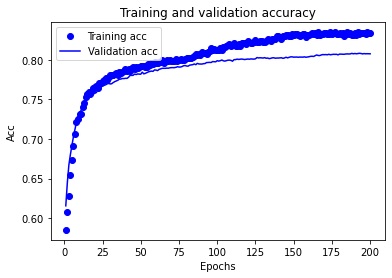

In [22]:
history_dict = history.history
acc_values = history_dict['acc'] 
val_acc_values = history_dict['val_acc']
epochs = range(1, len(acc_values) + 1)

import matplotlib.pyplot as plt
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

# RNN modelo 2
Defining the model structure

In [23]:
from tensorflow.keras import models, layers

from tensorflow.keras import models, layers
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.preprocessing import sequence

model2 = models.Sequential()
model2.add(SimpleRNN(32, return_sequences = True))
model2.add(SimpleRNN(32, return_sequences = True))
model2.add(SimpleRNN(32))
model2.add(Dense(1, activation='sigmoid'))

Training the model and plotting errors along the process

In [24]:
model2.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

In [25]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

es = EarlyStopping(monitor='val_loss', patience=30)
mc = ModelCheckpoint('best_model_2.h5', monitor='val_loss', mode='min', save_best_only=True)

history = model2.fit(partial_X_train,
                    partial_Y_train,
                    epochs=200,
                    batch_size=512,
                    callbacks = [es,mc],
                    validation_data=(X_val, Y_val))

Epoch 1/200
4/4 [==============================] - 3s 219ms/step - loss: 0.7261 - acc: 0.5316 - val_loss: 0.6428 - val_acc: 0.6112
Epoch 2/200
4/4 [==============================] - 0s 20ms/step - loss: 0.6375 - acc: 0.6260 - val_loss: 0.6033 - val_acc: 0.6700
Epoch 3/200
4/4 [==============================] - 0s 20ms/step - loss: 0.6026 - acc: 0.6811 - val_loss: 0.5766 - val_acc: 0.7041
Epoch 4/200
4/4 [==============================] - 0s 19ms/step - loss: 0.5767 - acc: 0.7109 - val_loss: 0.5546 - val_acc: 0.7171
Epoch 5/200
4/4 [==============================] - 0s 20ms/step - loss: 0.5529 - acc: 0.7223 - val_loss: 0.5371 - val_acc: 0.7285
Epoch 6/200
4/4 [==============================] - 0s 16ms/step - loss: 0.5384 - acc: 0.7322 - val_loss: 0.5225 - val_acc: 0.7398
Epoch 7/200
4/4 [==============================] - 0s 19ms/step - loss: 0.5162 - acc: 0.7484 - val_loss: 0.5106 - val_acc: 0.7485
Epoch 8/200
4/4 [==============================] - 0s 22ms/step - loss: 0.5087 - acc: 0.7

4/4 [==============================] - 0s 22ms/step - loss: 0.3945 - acc: 0.8252 - val_loss: 0.4383 - val_acc: 0.8073
Epoch 64/200
4/4 [==============================] - 0s 21ms/step - loss: 0.3832 - acc: 0.8359 - val_loss: 0.4386 - val_acc: 0.8052
Epoch 65/200
4/4 [==============================] - 0s 22ms/step - loss: 0.3895 - acc: 0.8287 - val_loss: 0.4399 - val_acc: 0.8023
Epoch 66/200
4/4 [==============================] - 0s 21ms/step - loss: 0.3957 - acc: 0.8191 - val_loss: 0.4396 - val_acc: 0.8033
Epoch 67/200
4/4 [==============================] - 0s 21ms/step - loss: 0.3952 - acc: 0.8289 - val_loss: 0.4390 - val_acc: 0.8054
Epoch 68/200
4/4 [==============================] - 0s 20ms/step - loss: 0.3995 - acc: 0.8258 - val_loss: 0.4380 - val_acc: 0.8071
Epoch 69/200
4/4 [==============================] - 0s 26ms/step - loss: 0.3874 - acc: 0.8280 - val_loss: 0.4395 - val_acc: 0.8044
Epoch 70/200
4/4 [==============================] - 0s 24ms/step - loss: 0.3861 - acc: 0.8323 - 

4/4 [==============================] - 0s 23ms/step - loss: 0.3480 - acc: 0.8469 - val_loss: 0.4362 - val_acc: 0.8109
Epoch 126/200
4/4 [==============================] - 0s 27ms/step - loss: 0.3456 - acc: 0.8483 - val_loss: 0.4345 - val_acc: 0.8076
Epoch 127/200
4/4 [==============================] - 0s 23ms/step - loss: 0.3479 - acc: 0.8409 - val_loss: 0.4362 - val_acc: 0.8081
Epoch 128/200
4/4 [==============================] - 0s 25ms/step - loss: 0.3436 - acc: 0.8476 - val_loss: 0.4338 - val_acc: 0.8115
Epoch 129/200
4/4 [==============================] - 0s 24ms/step - loss: 0.3452 - acc: 0.8449 - val_loss: 0.4347 - val_acc: 0.8131
Epoch 130/200
4/4 [==============================] - 0s 23ms/step - loss: 0.3282 - acc: 0.8537 - val_loss: 0.4340 - val_acc: 0.8116


In [26]:
model2.load_weights('best_model_2.h5')
score = model2.evaluate(X_test, Y_test, verbose = 0)

print('Test Loss', score[0])
print('Test accuracy', score[1])

Test Loss 0.3916347622871399
Test accuracy 0.8363397717475891


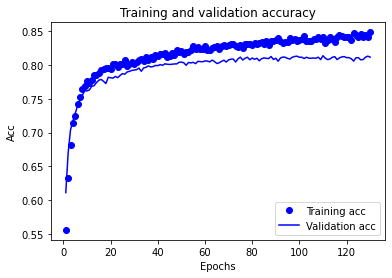

In [27]:
history_dict = history.history
acc_values = history_dict['acc'] 
val_acc_values = history_dict['val_acc']
epochs = range(1, len(acc_values) + 1)

import matplotlib.pyplot as plt
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()